<a href="https://colab.research.google.com/github/gabrielberthier/notebookes-sistemas-inteligentes/blob/main/sis-int-ativ-2-Gabriel%20Nogueira%20Berthier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IFMA - Instituto Federal de Educação, Ciência e Tecnologia do Maranhão**

Disciplina: Introdução aos Sistemas Inteligentes

Professor: Josenildo Costa da Silva

Aluno: Gabriel Nogueira Berthier da Silva (20172SI0122)

Dataset Escolhido: 
**[Fetal Health Condition Dataset (Condição de Saúde Fetal)](https://www.kaggle.com/andrewmvd/fetal-health-classification)**

<br>

2.126 cardiotocogramas fetais (CTG) foram processados automaticamente e as respectivas características diagnósticas medidas. Os CTG também foram classificados por três obstetras especialistas e uma etiqueta de classificação de consenso atribuída a cada um deles. A classificação foi tanto em relação a um padrão morfológico (A, B, C. ...) e a um estado fetal (N, S, P). Portanto, o conjunto de dados pode ser usado para experimentos de 10 ou 3 classes.

Neste exemplo, utilizo o dataset para classificar o estado fetal, N - Normal (1.0), S - Suspeito (2.0) e Patológico (3.0).

# Atividade:

# Sobre o dataset:


# Leitura e preparação dos dados:

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

seed = 50

In [185]:
# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# machine learning libraries
from sklearn.ensemble import RandomForestClassifier

# postprocessing and checking-results libraries
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [186]:
from imblearn.over_sampling import RandomOverSampler

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
fetal_health = pd.read_csv("/content/sample_data/fetal_health.csv")


In [189]:
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [190]:
fetal_health.shape 

(2126, 22)

In [191]:
fetal_health.isnull().sum()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [192]:
fetal_health.dtypes


baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [193]:
def plotConfusionMatrix(dtrue,dpred,classes,title = 'Confusion Matrix',\
                        width = 0.75,cmap = plt.cm.Blues):
  
    cm = confusion_matrix(dtrue,dpred)
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]

    fig,ax = plt.subplots(figsize = (np.shape(classes)[0] * width,\
                                       np.shape(classes)[0] * width))
    im = ax.imshow(cm,interpolation = 'nearest',cmap = cmap)

    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           aspect = 'equal')
    
    ax.set_ylabel('True',labelpad = 20)
    ax.set_xlabel('Predicted',labelpad = 20)

    plt.setp(ax.get_xticklabels(),rotation = 90,ha = 'right',
             va = 'center',rotation_mode = 'anchor')

    fmt = '.2f'

    thresh = cm.max() / 2.0

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,format(cm[i,j],fmt),ha = 'center',va = 'center',
                    color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.show()
    

In [194]:
# Student note (Gabriel Berthier):
# This classification was used based on a notebook available in 
# https://www.kaggle.com/scratchpad/notebookea9989e29c/edit
# Which used random forest to provide classification

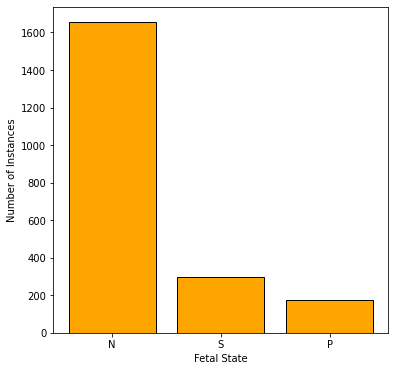

In [195]:
y = LabelEncoder().fit_transform(fetal_health['fetal_health'])
X = fetal_health.drop(columns = ['fetal_health'],axis = 1)
count = np.zeros(3)
for i in range(3):
    count[i] = np.where(y == i)[0].size
    
plt.subplots(figsize = (6.0,6.0))
plt.bar(np.arange(3),count,color = 'orange',edgecolor = 'black')
plt.xticks(np.arange(3),('N','S','P'))
plt.xlabel('Fetal State')
plt.ylabel('Number of Instances')
plt.show()

In [196]:
new_fetal_health = fetal_health
x = new_fetal_health.iloc[:,new_fetal_health.columns != "fetal_health"]

In [197]:
y = new_fetal_health.iloc[:,new_fetal_health.columns == "fetal_health"]

In [198]:
x = np.array(x)
y = np.array(y)


## Modelagem




In [199]:
y = y.reshape((y.shape[0], ))
y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=seed)

### Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=seed).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [201]:
prediction_classes = clf.predict(x_test)

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_classes))

              precision    recall  f1-score   support

         1.0       0.89      0.96      0.93       492
         2.0       0.64      0.39      0.49        87
         3.0       0.82      0.76      0.79        59

    accuracy                           0.87       638
   macro avg       0.78      0.70      0.73       638
weighted avg       0.85      0.87      0.85       638



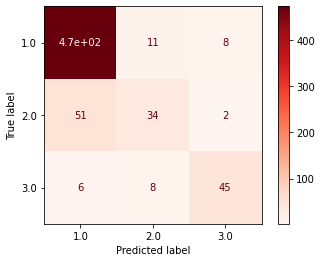

In [203]:
plot_confusion_matrix(clf, x_test, y_test, cmap="Reds")  
plt.show()

### Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb = GNB()
predicted_classes = gnb.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         1.0       0.97      0.83      0.89       492
         2.0       0.49      0.83      0.62        87
         3.0       0.61      0.73      0.66        59

    accuracy                           0.82       638
   macro avg       0.69      0.80      0.72       638
weighted avg       0.87      0.82      0.84       638



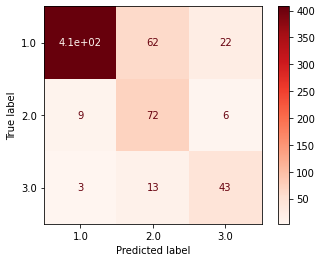

In [205]:
plot_confusion_matrix(gnb, x_test, y_test, cmap="Reds")  
plt.show()

### Random Forrest

In [206]:
from sklearn.ensemble import RandomForestClassifier
random_forrest_classifier = RandomForestClassifier()
classes = random_forrest_classifier.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       492
         2.0       0.86      0.74      0.80        87
         3.0       0.92      0.97      0.94        59

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



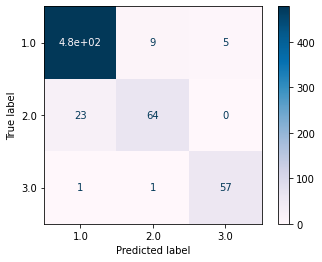

In [207]:
plot_confusion_matrix(random_forrest_classifier, x_test, y_test, cmap="PuBu")  
plt.show()

In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classes)

0.9388714733542319

### SVC (Support Vector Classification)

In [209]:
from sklearn.svm import SVC
svc = SVC()
classes = svc.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

         1.0       0.88      0.98      0.93       492
         2.0       0.63      0.43      0.51        87
         3.0       0.91      0.51      0.65        59

    accuracy                           0.86       638
   macro avg       0.81      0.64      0.70       638
weighted avg       0.85      0.86      0.84       638



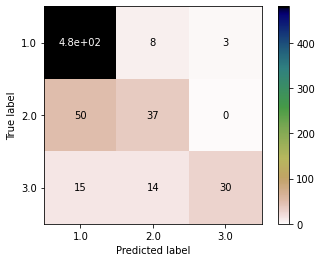

In [210]:
plot_confusion_matrix(svc, x_test, y_test, cmap="gist_earth_r")  
plt.show()

# Conclusão

Por vezes, há momentos em que o Logistic Regression tende a ser um classificador a ser evitado, entretanto na presença de mais de uma variável explicativa pode obter melhor acurácia para múltiplas classes que outros algoritmos (como o SVC e o Naive Baynes). Mediante a comparação de acurácia entre os quatro classificadores provisionados - Naive Bayne, Logistic Regression, Random Forrest e SVC -, o algoritmo que proporcionou melhor resultado de acurácia, assim como melhor diagonal principal, foi o Random Forrest, que obteve acurácia de quase 0.94 e se destacou bastante dos demais, tidos como algoritmos "mais simples". 
<br>


# Ajustes de hyperparâmetros dos algoritmos

### Antes e depois

In [211]:
# Antes 
random_forrest_classifier = RandomForestClassifier()
classes = random_forrest_classifier.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, classes))


              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       492
         2.0       0.85      0.71      0.77        87
         3.0       0.90      0.97      0.93        59

    accuracy                           0.93       638
   macro avg       0.90      0.88      0.89       638
weighted avg       0.93      0.93      0.93       638



In [257]:
# Depois

random_forrest_classifier = RandomForestClassifier( criterion="entropy", class_weight="balanced" )
classes = random_forrest_classifier.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       492
         2.0       0.85      0.76      0.80        87
         3.0       0.98      0.95      0.97        59

    accuracy                           0.94       638
   macro avg       0.93      0.89      0.91       638
weighted avg       0.94      0.94      0.94       638



Utilizando o conceito de critério por entropia e o peso das classes como balanceadas, foi possível aumentar a precisão da classe 3.0 (que descreve casos de saúde patológicos) tal qual o f1-score. Desta forma, tanto classes normais (1.0) quanto classes patológicas (3.0) são bem identificadas, havendo menor espaço para classificação somente para casos suspeitos. 